In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r"C:\Users\Aayush\Documents\Python Learning\pandas-project\Data Analysis with python\Customers Churn Prediction\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Dropping Irrelevant Features

In [5]:
## We don't need RowNumeber, Customerid & Surname column, drop it

df = df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.shape

(10000, 11)

# Encoding Categorical Data

In [6]:
dummy = pd.get_dummies(df[['Geography','Gender']]).astype(int)


In [7]:
df = pd.concat([df,dummy],axis =1)

df.drop(columns=['Geography','Gender'],axis =1,inplace=True)

df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


## Some insights about the target variable

In [22]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

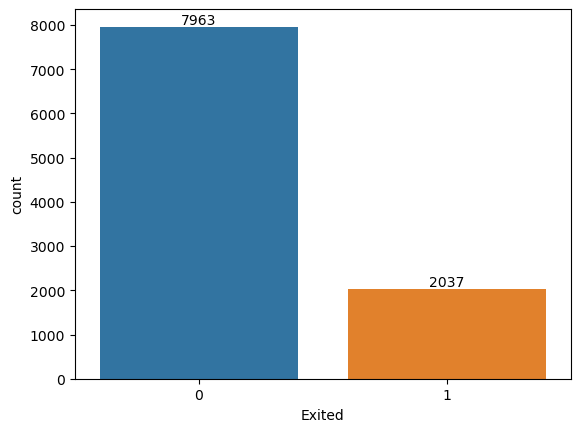

In [25]:
ax = sns.countplot(x='Exited', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [8]:
X= df.drop('Exited',axis =1)
Y = df['Exited']

### Handling Imbalanced Data with SMOTE

In [1]:
from imblearn.over_sampling import SMOTE

In [9]:
X_res, y_res = SMOTE().fit_resample(X,Y)

In [10]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

## Splitting the Dataset into training set and test set

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.3, random_state=47)

## Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scale = StandardScaler()

In [16]:
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [18]:
x_train

array([[ 0.76290852, -0.89808575,  0.78562414, ...,  2.15977641,
         1.21319428, -0.83273815],
       [-0.67439837, -0.79784586,  1.15480755, ..., -0.46301089,
        -0.82427029,  1.20085767],
       [-1.316831  ,  0.20455304,  0.78562414, ...,  2.15977641,
        -0.82427029,  1.20085767],
       ...,
       [-0.18440738,  1.50767161,  0.41644074, ..., -0.46301089,
         1.21319428, -0.83273815],
       [ 0.47980262, -0.99832565, -1.42947629, ..., -0.46301089,
        -0.82427029,  1.20085767],
       [ 1.63400361,  2.20935084, -1.42947629, ..., -0.46301089,
         1.21319428, -0.83273815]])

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log = LogisticRegression()

In [21]:
log.fit(x_train,y_train)

LogisticRegression()

In [22]:
y_pred1 = log.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test, y_pred1)

0.8336123901213897

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [26]:
precision_score(y_test,y_pred1)

0.8609550561797753

In [27]:
recall_score(y_test, y_pred1)

0.7869062901155327

In [28]:
f1_score(y_test, y_pred1)

0.8222669349429913

## SVC

In [30]:
from sklearn import svm

In [31]:
svm = svm.SVC()

In [32]:
svm.fit(x_train, y_train)

SVC()

In [33]:
y_pred2 = svm.predict(x_test)

In [34]:
accuracy_score(y_test, y_pred2)

0.8742151527835914

In [35]:
precision_score(y_test, y_pred2)

0.9125475285171103

In [36]:
recall_score(y_test, y_pred2)

0.8215661103979461

In [37]:
f1_score(y_test, y_pred2)

0.8646701193424905

## KNeighbors Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred3 = knn.predict(x_test)

In [41]:
accuracy_score(y_test, y_pred3)

0.858727501046463

In [42]:
precision_score(y_test, y_pred3)

0.8709821428571428

In [43]:
recall_score(y_test, y_pred3)

0.8348309798887462

In [44]:
f1_score(y_test, y_pred3)

0.8525234870002185

## Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [48]:
y_pred4 = dt.predict(x_test)

In [49]:
accuracy_score(y_test, y_pred4)

0.8348681456676433

In [50]:
precision_score(y_test, y_pred4)

0.8246644295302014

In [51]:
recall_score(y_test, y_pred4)

0.8412494651262302

In [52]:
f1_score(y_test, y_pred4)

0.832874391018852

## Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier()

rf.fit(x_train, y_train)

RandomForestClassifier()

In [55]:
y_pred5 = rf.predict(x_test)

In [56]:
accuracy_score(y_test, y_pred5)

0.8857262452909167

In [57]:
precision_score(y_test, y_pred5)

0.8967656180770935

In [58]:
recall_score(y_test, y_pred5)

0.8660676080445014

In [59]:
f1_score(y_test, y_pred5)

0.8811493252067916

## Gradient Boosting Classifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
gbc = GradientBoostingClassifier()

gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [62]:
y_pred6 = gbc.predict(x_test)

In [63]:
accuracy_score(y_test, y_pred6)

0.8727501046462955

In [64]:
precision_score(y_test, y_pred6)

0.8974712643678161

In [65]:
recall_score(y_test, y_pred6)

0.8352588789045785

In [66]:
f1_score(y_test, y_pred6)

0.8652482269503546

## XGBoost

In [67]:
import xgboost as xgb

In [68]:
model_xgb = xgb.XGBClassifier(random_state = 42, verbosity =0)
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [69]:
y_pred7 = model_xgb.predict(x_test)

In [70]:
accuracy_score(y_test, y_pred7)

0.537044788614483

In [71]:
precision_score(y_test, y_pred7)

0.5140040331615505

In [72]:
recall_score(y_test, y_pred7)

0.9816003423192127

In [73]:
f1_score(y_test, y_pred7)

0.6747058823529412

## Accuracy Summary

In [74]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'ACC':[
        accuracy_score(y_test, y_pred1),
        accuracy_score(y_test, y_pred2),
        accuracy_score(y_test, y_pred3),
        accuracy_score(y_test, y_pred4),
        accuracy_score(y_test, y_pred5),
        accuracy_score(y_test, y_pred6),
        accuracy_score(y_test, y_pred7)
    ]
})

In [75]:
performance_summary

,Model,ACC
0,LR,0.833612
1,SVC,0.874215
2,KNN,0.858728
3,DT,0.834868
4,RF,0.885726
5,GBC,0.872750
6,XGB,0.537045


In [77]:
sns.barplot(performance_summary['Model'],performance_summary['ACC'])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Axes: xlabel='Model', ylabel='Value'>

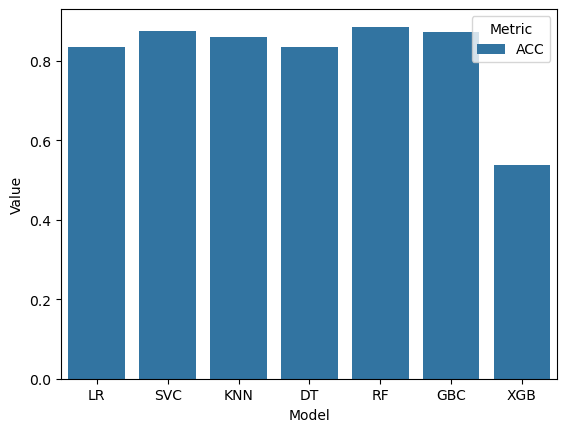

In [79]:
melted_data = performance_summary.melt(id_vars ='Model', var_name='Metric',value_name='Value')
sns.barplot(x='Model',y='Value', hue = 'Metric', data = melted_data)

In [81]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'PRECISION':[precision_score(y_test,y_pred1),
           precision_score(y_test,y_pred2),
           precision_score(y_test,y_pred3),
           precision_score(y_test,y_pred4),
           precision_score(y_test,y_pred5),
           precision_score(y_test,y_pred6),
            precision_score(y_test,y_pred7)
          ]
})

performance_summary

,Model,PRECISION
0,LR,0.860955
1,SVC,0.912548
2,KNN,0.870982
3,DT,0.824664
4,RF,0.896766
5,GBC,0.897471
6,XGB,0.514004


In [84]:
x_train = scale.fit_transform(x_train)

model_xgb.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)